# Classification

### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib .pyplot import subplots

# StatsModel
import statsmodels .api as sm

# Scikit-Learn
from sklearn. discriminant_analysis import \
( LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn. naive_bayes import GaussianNB
from sklearn. preprocessing import StandardScaler
from sklearn. neighbors import KNeighborsClassifier
from sklearn. linear_model import LogisticRegression
from sklearn. model_selection import train_test_split

In [4]:
# Custom Libraries
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from ISLP.models import ( ModelSpec as MS ,
summarize )

## Logistic Regression, LDA, QDA, & KNN

### The Stock Market Data

In [7]:
Smarket = load_data ('Smarket')

Smarket

Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]

In [9]:
# Checking column's Name
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [12]:
# Smarket.corr()

corr = Smarket.drop(columns="Direction").corr()

print(corr)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [14]:
Smarket2 = Smarket.copy()
Smarket2["Direction"] = Smarket2["Direction"].map({"Down": 0, "Up": 1})

corr = Smarket2.corr(numeric_only=True)
print(corr)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [15]:
Smarket2.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000  0.029700  0.030596  0.033195  0.035689  0.029788   
Lag1       0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675   
Lag2       0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558   
Lag3       0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808   
Lag4       0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084   
Lag5       0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000   
Volume     0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002   
Today      0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860   
Direction  0.074608 -0.039757 -0.024081  0.006132  0.004215  0.005423   

             Volume     Today  Direction  
Year       0.539006  0.030095   0.074608  
Lag1       0.040910 -0.026155  -0.039757  
Lag2      -0.043383 -0.010250  -0.024081  
Lag3      -0.041824 -0.002448   0.006132  
Lag4      -0.048414 -0.006900   0.004215  
Lag5      -0.022002 -0.034860   0.005423  
Volume     1.000000  0.014592   0.022951  
Today      0.014592  1.000000   0.730563  
Direction  0.022951  0.730563   1.000000

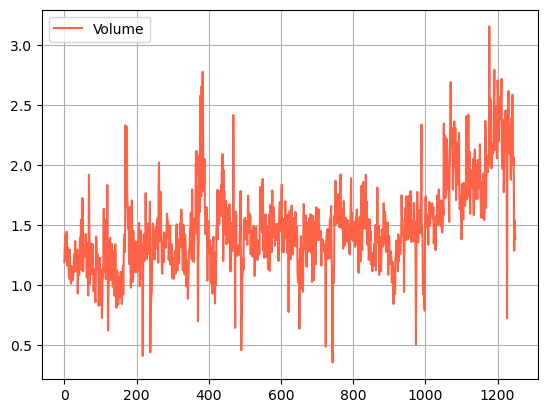

In [20]:
Smarket2.plot(y='Volume', color="tomato");
plt.grid(True)
plt.show()

In [ ]:
### 